## getting weights for pi0 backgrounds

This note book loads in a set of text files from a selection, calculates pi0 weights for all selected events, and saves the result to a text file. Events without a true pi0 are given a weight of 1.0

In [7]:
%matplotlib inline

from ROOT import TFile,vector,TGraph
import ROOT
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import matplotlib as mpl

import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
import json

In [8]:
# set some parameters for weighting
# a_CC= 2.75e-06
# b_CC= -0.0032
# c_CC = 1.553

# a_NC= 2.54e-06
# b_NC= -0.0039
# c_NC = 1.494

a_CC= 3.425e-06
b_CC= -0.0039
c_CC = 1.784

# polynomial
# a_NC= 1.885e-06
# b_NC= -0.00316
# c_NC = 1.442
#polynomial-prefit
a_NC= 1.3148535274393397e-06
b_NC= -0.002448575873076658
c_NC= 1.2349717365121429 

# exp, type 1
# a_NC=  1.6580001273516307
# b_NC=  -0.0023847179690779535
# c_NC=  -0.15563226626943488
#line, type 2
# a_NC=  -0.001548135947962668
# b_NC=  1.1560095480447843
# c_NC =0

# load in txt files
background_folder = "/home/kmason/pythonscratch_newshowerreco/dllee_unified/1L1PSelection/data/backgrounds/"

# standard 1e1p
background_mu_1 = open(background_folder+"1e1p_final_avgscore/eventlist_overlay_run1.txt",'r')
background_mu_2 = open(background_folder+"1e1p_final_avgscore/eventlist_overlay_run2.txt",'r')
background_mu_3 = open(background_folder+"1e1p_final_avgscore/eventlist_overlay_run3.txt",'r') 
background_e_1 = open(background_folder+"1e1p_final_avgscore/eventlist_intrinsics_run1.txt",'r')
background_e_2 = open(background_folder+"1e1p_final_avgscore/eventlist_intrinsics_run2.txt",'r')
background_e_3 = open(background_folder+"1e1p_final_avgscore/eventlist_intrinsics_run3.txt",'r') 
background_ccpi0_1 = open(background_folder+"1e1p_final_avgscore/eventlist_ccpi0_run1.txt",'r')
background_ccpi0_3 = open(background_folder+"1e1p_final_avgscore/eventlist_ccpi0_run3.txt",'r')
background_ncpi0_1 = open(background_folder+"1e1p_final_avgscore/eventlist_ncpi0_run1.txt",'r')
background_ncpi0_3 = open(background_folder+"1e1p_final_avgscore/eventlist_ncpi0_run3.txt",'r')


# bdt cut
# background_mu_1 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_overlay_run1.txt",'r')
# background_mu_2 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_overlay_run2.txt",'r')
# background_mu_3 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_overlay_run3.txt",'r') 
# background_e_1 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_intrinsics_run1.txt",'r')
# background_e_2 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_intrinsics_run2.txt",'r')
# background_e_3 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_intrinsics_run3.txt",'r') 
# background_ccpi0_1 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_ccpi0_run1.txt",'r')
# background_ccpi0_3 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_ccpi0_run3.txt",'r')
# background_ncpi0_1 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_ncpi0_run1.txt",'r')
# background_ncpi0_3 = open(background_folder+"1e1p_lowBDT_avgscore/eventlist_ncpi0_run3.txt",'r')

# kin cut
# background_mu_1 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_overlay_run1.txt",'r')
# background_mu_2 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_overlay_run2.txt",'r')
# background_mu_3 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_overlay_run3.txt",'r') 
# background_e_1 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_intrinsics_run1.txt",'r')
# background_e_2 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_intrinsics_run2.txt",'r')
# background_e_3 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_intrinsics_run3.txt",'r') 
# background_ccpi0_1 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_ccpi0_run1.txt",'r')
# background_ccpi0_3 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_ccpi0_run3.txt",'r')
# background_ncpi0_1 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_ncpi0_run1.txt",'r')
# background_ncpi0_3 = open(background_folder+"1e1p_loosecut_avgscore/eventlist_ncpi0_run3.txt",'r')

# highE
# background_mu_1 = open(background_folder+"1e1p_highE_avgscore/eventlist_overlay_run1.txt",'r')
# background_mu_2 = open(background_folder+"1e1p_highE_avgscore/eventlist_overlay_run2.txt",'r')
# background_mu_3 = open(background_folder+"1e1p_highE_avgscore/eventlist_overlay_run3.txt",'r') 
# background_e_1 = open(background_folder+"1e1p_highE_avgscore/eventlist_intrinsics_run1.txt",'r')
# background_e_2 = open(background_folder+"1e1p_highE_avgscore/eventlist_intrinsics_run2.txt",'r')
# background_e_3 = open(background_folder+"1e1p_highE_avgscore/eventlist_intrinsics_run3.txt",'r') 
# background_ccpi0_1 = open(background_folder+"1e1p_highE_avgscore/eventlist_ccpi0_run1.txt",'r')
# background_ccpi0_3 = open(background_folder+"1e1p_highE_avgscore/eventlist_ccpi0_run3.txt",'r')
# background_ncpi0_1 = open(background_folder+"1e1p_highE_avgscore/eventlist_ncpi0_run1.txt",'r')
# background_ncpi0_3 = open(background_folder+"1e1p_highE_avgscore/eventlist_ncpi0_run3.txt",'r')

# 1mu1p backgrounds
# background_mu_1 = open(background_folder+"1mu1p/FinalSelection0_overlay_run1.txt",'r')
# background_mu_2 = open(background_folder+"1mu1p/FinalSelection0_overlay_run2.txt",'r')
# background_mu_3 = open(background_folder+"1mu1p/FinalSelection0_overlay_run3.txt",'r') 
# background_e_1 = open(background_folder+"1mu1p/FinalSelection0_intrinsics_run1.txt",'r')
# background_e_2 = open(background_folder+"1mu1p/FinalSelection0_intrinsics_run2.txt",'r')
# background_e_3 = open(background_folder+"1mu1p/FinalSelection0_intrinsics_run3.txt",'r') 
# background_ccpi0_1 = open(background_folder+"1mu1p/FinalSelection0_ccpi0_run1.txt",'r')
# background_ccpi0_3 = open(background_folder+"1mu1p/FinalSelection0_ccpi0_run3.txt",'r')
# background_ncpi0_1 = open(background_folder+"1mu1p/FinalSelection0_ncpi0_run1.txt",'r')
# background_ncpi0_3 = open(background_folder+"1mu1p/FinalSelection0_ncpi0_run3.txt",'r')

In [9]:
# load in truth files
f_bnb_run1_1= open("../data/truthvariables_numu1_1mil_1.json", "r")
truthdata_bnb_r1_1 = json.load(f_bnb_run1_1)
f_bnb_run1_2= open("../data/truthvariables_numu1_1mil_2.json", "r")
truthdata_bnb_r1_2 = json.load(f_bnb_run1_2)
f_bnb_run2_1= open("../data/truthvariables_numu2_1mil_1.json", "r")
truthdata_bnb_r2_1 = json.load(f_bnb_run2_1)
f_bnb_run2_2= open("../data/truthvariables_numu2_1mil_2.json", "r")
truthdata_bnb_r2_2 = json.load(f_bnb_run2_2)
f_bnb_run3= open("../data/truthvariables_bnb_overlay_run3.json", "r")
truthdata_bnb_r3 = json.load(f_bnb_run3)

f_nue_run1= open("../data/truthvariables_nue_intrinsics_run1.json", "r")
truthdata_nue_r1 = json.load(f_nue_run1)
f_nue_run2= open("../data/truthvariables_nue_intrinsics_run2.json", "r")
truthdata_nue_r2 = json.load(f_nue_run2)
f_nue_run3= open("../data/truthvariables_nue_intrinsics_run3.json", "r")
truthdata_nue_r3 = json.load(f_nue_run3)

f_ccpi0_run1 = open("../data/truthvariables_ccpi0_run1.json", "r")
truthdata_ccpi0_r1 =json.load(f_ccpi0_run1)
f_ccpi0_run3 = open("../data/truthvariables_ccpi0_run3.json", "r")
truthdata_ccpi0_r3 =json.load(f_ccpi0_run3)
f_ncpi0_run1 = open("../data/truthvariables_ncpi0_run1.json", "r")
truthdata_ncpi0_r1 =json.load(f_ncpi0_run1)
f_ncpi0_run3a = open("../data/truthvariables_ncpi0_run3a.json", "r")
truthdata_ncpi0_r3a =json.load(f_ncpi0_run3a)
f_ncpi0_run3b = open("../data/truthvariables_ncpi0_run3b.json", "r")
truthdata_ncpi0_r3b =json.load(f_ncpi0_run3b)

In [10]:
# next(background_ncpi0_1)#remove header line
# for line in background_ncpi0_1:
#     vals = line.split(" ")
#     selected_run=int(vals[0])
#     selected_subrun=int(vals[1])
#     selected_event=int(vals[2])
#     selected_ccnc=float(vals[38])
#     selected_Enu=float(vals[91])
#     print(selected_run,selected_subrun,selected_event,selected_ccnc,selected_Enu)

In [11]:
# function that finds matches and save the pi0 weights. 
def getPi0Weights(selected_textlist, truthdata,run2=False,large=False,truthdata2=[] ):
    #initialize output vector
    pi0weight_v=[]
    pi0mom_v=[]
    run_v=[]
    subrun_v=[]
    event_v=[]
    ccnc_v=[]
    Enu_v=[]
    bdt_v = []
    #get variable lists from the selected events text list 
    #From 1e1p files :r[0],s[1],e[2],CCNC[39],Etrue[38]
    #From 1e1p files :r[0],s[1],e[2],CCNC[47],Etrue[46]
    
    next(selected_textlist)#remove header line
    for line in selected_textlist:
        vals = line.split(" ")
        selected_run=int(vals[0])
        selected_subrun=int(vals[1])
        selected_event=int(vals[2])
        selected_ccnc=float(vals[38])
        selected_Enu=float(vals[91])
        selected_bdt=float(vals[91])
        run_v.append(selected_run)
        subrun_v.append(selected_subrun)
        event_v.append(selected_event)
        ccnc_v.append(selected_ccnc)
        Enu_v.append(selected_Enu)
        bdt_v.append(selected_bdt)
        
    for i in range(len(run_v)):
        if bdt_v[i] >.95:
            #now loop through the truthjson to find matching r,s,e (enu if run2)
            foundmatch=False
            for x in range(len(truthdata["entries"])):
                true_run = truthdata["entries"][x]["run"]
                true_subrun = truthdata["entries"][x]["subrun"]
                true_event = truthdata["entries"][x]["event"]
                if(run2):
                    true_energy = truthdata["entries"][x]["Enu_true"]

                if (true_run ==run_v[i] and true_subrun ==subrun_v[i] and true_event ==event_v[i] and foundmatch==False):
                    if(run2==False):
                        foundmatch=True
                    elif(abs(true_energy-Enu_v[i])>2):
                        foundmatch=False
                    else:
                        foundmatch=True

                    #if there is a match check for pi0 events
                    if (foundmatch==True):
                        pi0found=False
                        for part in range(len(truthdata["entries"][x]['particle_pdg'])):
                            pdg = truthdata["entries"][x]['particle_pdg'][part]
                            #if a pi0 is found, get the weight
                            if (pdg == 111 and  not pi0found):
                                px= truthdata["entries"][x]['particle_Px'][part]*1000.0
                                py= truthdata["entries"][x]['particle_Py'][part]*1000.0
                                pz=truthdata["entries"][x]['particle_Pz'][part]*1000.0
                                ptot = sqrt(px**2+py**2+pz**2)
                                pi0mom_v.append(ptot)
                                pi0weight_v.append(1.0)
                                #different weights for ccnc
                                if ccnc_v[i]==0:
                                    pi0weight_v.append(a_CC*(ptot**2)+b_CC*ptot+c_CC)
    #                                 pi0mom_v.append(ptot)
                                else:
                                   
                            
#                                         pi0weight_v.append(a_NC*np.exp(b_NC*ptot)+c_NC)
                                    pi0weight_v.append(a_NC*(ptot**2)+b_NC*ptot+c_NC)
    #                                 if (ptot <700):
    #                                     pi0weight_v.append((a_NC * ptot + b_NC))
    #                                 else:
    #                                     pi0weight_v.append((a_NC * 700 + b_NC))
#                                     if(bdt_v[i]>.95):
#                                         pi0mom_v.append(ptot)
#                                     else:
#                                         pi0mom_v.append(-999)

                                pi0found=True

                        #if no pi0 in event set weight to 1.0
                        if (pi0found==False):
                            pi0weight_v.append(1.0)
                            pi0mom_v.append(-999)


            #if found match is still false, and large, loop through other sample
            if (foundmatch==False and large==True):
    #             print("here")
                for x in range(len(truthdata2["entries"])):
                    true_run = truthdata2["entries"][x]["run"]
                    true_subrun = truthdata2["entries"][x]["subrun"]
                    true_event = truthdata2["entries"][x]["event"]
                    if(run2):
                        true_energy = truthdata2["entries"][x]["Enu_true"]

                    if (true_run ==run_v[i] and true_subrun ==subrun_v[i] and true_event ==event_v[i] and foundmatch==False):
                        if(run2==False):
                            foundmatch=True
                        elif(abs(true_energy-Enu_v[i])>2):
                            foundmatch=False
                        else:
                            foundmatch=True

                        #if there is a match check for pi0 events
                        if (foundmatch==True):
                            pi0found=False
                            for part in range(len(truthdata2["entries"][x]['particle_pdg'])):
                                pdg = truthdata2["entries"][x]['particle_pdg'][part]
                                #if a pi0 is found, get the weight
                                if (pdg == 111 and  not pi0found):
                                    px= truthdata2["entries"][x]['particle_Px'][part]*1000.0
                                    py= truthdata2["entries"][x]['particle_Py'][part]*1000.0
                                    pz=truthdata2["entries"][x]['particle_Pz'][part]*1000.0
                                    ptot = sqrt(px**2+py**2+pz**2)
                                    pi0mom_v.append(ptot)
                                    pi0weight_v.append(1.0)
                                    #different weights for ccnc
                                    if ccnc_v[i]==0:
                                        pi0weight_v.append(a_CC*(ptot**2)+b_CC*ptot+c_CC)
#                                         pi0mom_v.append(ptot)
                                    else:
#                                         if ((a_NC*np.exp(b_NC*ptot)+c_NC) < 0.001):
#                                             pi0weight_v.append(0.001)
#                                         else:
#                                             pi0weight_v.append(a_NC*np.exp(b_NC*ptot)+c_NC)
                                        pi0weight_v.append(a_NC*(ptot**2)+b_NC*ptot+c_NC)
    #                                     if (ptot <700):
    #                                         pi0weight_v.append((a_NC * ptot + b_NC))
    #                                     else:
    #                                         pi0weight_v.append((a_NC * 700 + b_NC))
#                                         if(bdt_v[i]>.95):
#                                             pi0mom_v.append(ptot)
#                                         else:
#                                             pi0mom_v.append(-999)


                                    pi0found=True

                            #if no pi0 in event set weight to 1.0
                            if (pi0found==False):
                                pi0weight_v.append(1.0)
                                pi0mom_v.append(-999)

        #if no truth was found set weight to 1.0
#             if (foundmatch==False  ):
#                 pi0weight_v.append(1.0)
#                 pi0mom_v.append(-999)
#         else:
#             pi0weight_v.append(1.0)
#             pi0mom_v.append(-999)

    return run_v,subrun_v,event_v,Enu_v,pi0weight_v,pi0mom_v ,ccnc_v

In [12]:
# # # run the function for each set

# # # numu selection:
# print("length of inputs, number of weights")
r1_numu_run, r1_numu_subrun, r1_numu_event, r1_numu_Enu, r1_numu_pi0weight, r1_numu_pi0mom, r1_numu_pi0ccnc = getPi0Weights(background_mu_1,truthdata_bnb_r1_1,False,True,truthdata_bnb_r1_2)
print("numu r1",len(r1_numu_run),len(r1_numu_pi0weight))
r2_numu_run, r2_numu_subrun, r2_numu_event, r2_numu_Enu, r2_numu_pi0weight, r2_numu_pi0mom, r2_numu_pi0ccnc = getPi0Weights(background_mu_2,truthdata_bnb_r2_1,True,True,truthdata_bnb_r2_2)
print("numu r2",len(r2_numu_run),len(r2_numu_pi0weight))
r3_numu_run, r3_numu_subrun, r3_numu_event, r3_numu_Enu, r3_numu_pi0weight, r3_numu_pi0mom, r3_numu_pi0ccnc = getPi0Weights(background_mu_3,truthdata_bnb_r3)
print("numu r3",len(r3_numu_run),len(r3_numu_pi0weight))
print(r1_numu_run[0],r1_numu_subrun[0],r1_numu_event[0])

# #nue selection:
r1_nue_run, r1_nue_subrun, r1_nue_event, r1_nue_Enu, r1_nue_pi0weight, r1_nue_pi0mom, r1_nue_pi0ccnc = getPi0Weights(background_e_1,truthdata_nue_r1)
print("nue r1",len(r1_nue_run),len(r1_nue_pi0weight))
r2_nue_run, r2_nue_subrun, r2_nue_event, r2_nue_Enu, r2_nue_pi0weight, r2_nue_pi0mom, r2_nue_pi0ccnc = getPi0Weights(background_e_2,truthdata_nue_r2,False)
print("nue r2",len(r2_nue_run),len(r2_nue_pi0weight))
r3_nue_run, r3_nue_subrun, r3_nue_event, r3_nue_Enu, r3_nue_pi0weight, r3_nue_pi0mom , r3_nue_pi0ccnc= getPi0Weights(background_e_3,truthdata_nue_r3)
print("nue r3",len(r3_nue_run),len(r3_nue_pi0weight))

# # #pi0 selection:
r1_ccpi0_run, r1_ccpi0_subrun, r1_ccpi0_event, r1_ccpi0_Enu, r1_ccpi0_pi0weight, r1_ccpi0_pi0mom, r1_ccpi0_pi0ccnc = getPi0Weights(background_ccpi0_1,truthdata_ccpi0_r1)
print("ccpi0 r1",len(r1_ccpi0_run),len(r1_ccpi0_pi0weight))
r3_ccpi0_run, r3_ccpi0_subrun, r3_ccpi0_event, r3_ccpi0_Enu, r3_ccpi0_pi0weight, r3_ccpi0_pi0mom, r3_ccpi0_pi0ccnc = getPi0Weights(background_ccpi0_3,truthdata_ccpi0_r3)
print("ccpi0 r3",len(r3_ccpi0_run),len(r3_ccpi0_pi0weight))
r1_ncpi0_run, r1_ncpi0_subrun, r1_ncpi0_event, r1_ncpi0_Enu, r1_ncpi0_pi0weight, r1_ncpi0_pi0mom, r1_ncpi0_pi0ccnc = getPi0Weights(background_ncpi0_1,truthdata_ncpi0_r1)
print("ncpi0 r1",len(r1_ncpi0_run),len(r1_ncpi0_pi0weight))
r3_ncpi0_run, r3_ncpi0_subrun, r3_ncpi0_event, r3_ncpi0_Enu, r3_ncpi0_pi0weight, r3_ncpi0_pi0mom , r3_ncpi0_pi0ccnc= getPi0Weights(background_ncpi0_3,truthdata_ncpi0_r3a,False,True,truthdata_ncpi0_r3b)
print("ncpi0 r3",len(r3_ncpi0_run),len(r3_ncpi0_pi0weight))
print(r3_ncpi0_pi0mom + r1_ncpi0_pi0mom)

numu r1 4953 11
numu r2 5074 0
numu r3 3467 12
7765 18 927
nue r1 12913 4339
nue r2 9890 3484
nue r3 5211 1691
ccpi0 r1 269 2
ccpi0 r3 242 4
ncpi0 r1 471 16
ncpi0 r3 462 4
[302.56127557632635, 404.32968836094193, 149.02041506193567, 289.19417167079826, 333.5691574310932, 216.16568203310268, 225.3491845704826, 157.7868350734377, 216.75379946268015, 168.09909949458677]


7
[0.         1.02249504 0.14148908 0.18135475 0.03095907 0.01749323
 0.03333519 0.0170875 ]
[0.         0.90976547 0.13225567 0.1755599  0.03280114 0.01834245
 0.03343818 0.01242457]


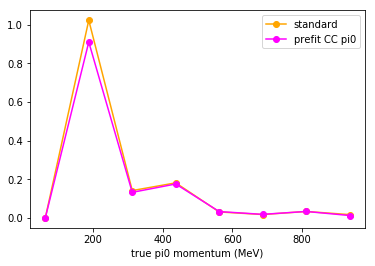

standard weights 1.4442138637411763
fit weights 1.3145873803813224
5 bin weights 1.7519782037611955
5 bin line 1.6215057062452476
normalization 1.6326843946638376
[0.514422717275842, 0.514422717275842, 0.514422717275842, 0.514422717275842, 0.514422717275842, 0.514422717275842]


In [17]:
Scale1 = 1.746e+20
Scale2 = 2.050e+20+6.507e+19
Scale3 =  4.3e+19+2e+20
Scale=Scale1+Scale2+Scale3


NUMU_R1_POT = 1.33678E+21
NUMU_R3_POT = 8.98773223801e+20
NUMU_R2_POT = 1.2992E+21
NCPI0_R1_POT = 2.90401e+21
NCPI0_R3_POT = 2.62745e+20 + 2.22482e+21

r1_numu_pi0mom_w = [Scale/float(NUMU_R1_POT) for i in range(len(r1_numu_pi0mom))]
r2_numu_pi0mom_w = [Scale/float(NUMU_R2_POT) for i in range(len(r2_numu_pi0mom))]
r3_numu_pi0mom_w = [Scale/float(NUMU_R3_POT) for i in range(len(r3_numu_pi0mom))]
r1_ncpi0_pi0mom_w = [Scale/float(NCPI0_R1_POT) for i in range(len(r1_ncpi0_pi0mom))]
r3_ncpi0_pi0mom_w = [Scale/float(NCPI0_R3_POT) for i in range(len(r3_ncpi0_pi0mom))]


a = 1.885e-06
b = -0.00316
c = 1.442
r1_numu_pi0mom_w_old = [Scale1/float(NUMU_R1_POT)*(a*(r1_numu_pi0mom[i]**2)+b*r1_numu_pi0mom[i]+c) for i in range(len(r1_numu_pi0mom))]
r2_numu_pi0mom_w_old = [Scale2/float(NUMU_R2_POT)*(a*(r2_numu_pi0mom[i]**2)+b*r2_numu_pi0mom[i]+c) for i in range(len(r2_numu_pi0mom))]
r3_numu_pi0mom_w_old = [Scale3/float(NUMU_R3_POT)*(a*(r3_numu_pi0mom[i]**2)+b*r3_numu_pi0mom[i]+c) for i in range(len(r3_numu_pi0mom))]
r1_ncpi0_pi0mom_w_old = [Scale1/float(NCPI0_R1_POT)*(a*(r1_ncpi0_pi0mom[i]**2)+b*r1_ncpi0_pi0mom[i]+c) for i in range(len(r1_ncpi0_pi0mom))]
r3_ncpi0_pi0mom_w_old = [Scale3/float(NCPI0_R3_POT)*(a*(r3_ncpi0_pi0mom[i]**2)+b*r3_ncpi0_pi0mom[i]+c) for i in range(len(r3_ncpi0_pi0mom))]

a= 1.3148535274393397e-06
b= -0.002448575873076658
c= 1.2349717365121429 
r1_numu_pi0mom_w_fit= [Scale1/float(NUMU_R1_POT)*(a*(r1_numu_pi0mom[i]**2)+b*r1_numu_pi0mom[i]+c) for i in range(len(r1_numu_pi0mom))]
r2_numu_pi0mom_w_fit = [Scale2/float(NUMU_R2_POT)*(a*(r2_numu_pi0mom[i]**2)+b*r2_numu_pi0mom[i]+c) for i in range(len(r2_numu_pi0mom))]
r3_numu_pi0mom_w_fit = [Scale3/float(NUMU_R3_POT)*(a*(r3_numu_pi0mom[i]**2)+b*r3_numu_pi0mom[i]+c) for i in range(len(r3_numu_pi0mom))]
r1_ncpi0_pi0mom_w_fit = [Scale1/float(NCPI0_R1_POT)*(a*(r1_ncpi0_pi0mom[i]**2)+b*r1_ncpi0_pi0mom[i]+c) for i in range(len(r1_ncpi0_pi0mom))]
r3_ncpi0_pi0mom_w_fit = [Scale3/float(NCPI0_R3_POT)*(a*(r3_ncpi0_pi0mom[i]**2)+b*r3_ncpi0_pi0mom[i]+c) for i in range(len(r3_ncpi0_pi0mom))]

a=  2.093816660137859e-06
b=  -0.003246790877041392
c=  1.5648383057401296
r1_numu_pi0mom_w_5 = [Scale1/float(NUMU_R1_POT)*(a*(r1_numu_pi0mom[i]**2)+b*r1_numu_pi0mom[i]+c) for i in range(len(r1_numu_pi0mom))]
r2_numu_pi0mom_w_5 = [Scale2/float(NUMU_R2_POT)*(a*(r2_numu_pi0mom[i]**2)+b*r2_numu_pi0mom[i]+c) for i in range(len(r2_numu_pi0mom))]
r3_numu_pi0mom_w_5 = [Scale3/float(NUMU_R3_POT)*(a*(r3_numu_pi0mom[i]**2)+b*r3_numu_pi0mom[i]+c) for i in range(len(r3_numu_pi0mom))]
r1_ncpi0_pi0mom_w_5 = [Scale1/float(NCPI0_R1_POT)*(a*(r1_ncpi0_pi0mom[i]**2)+b*r1_ncpi0_pi0mom[i]+c) for i in range(len(r1_ncpi0_pi0mom))]
r3_ncpi0_pi0mom_w_5 = [Scale3/float(NCPI0_R3_POT)*(a*(r3_ncpi0_pi0mom[i]**2)+b*r3_ncpi0_pi0mom[i]+c) for i in range(len(r3_ncpi0_pi0mom))]

norm = .716
r1_numu_pi0mom_w_norm= [Scale1/float(NUMU_R1_POT)*norm for i in range(len(r1_numu_pi0mom))]
r2_numu_pi0mom_w_norm = [Scale2/float(NUMU_R2_POT)*norm for i in range(len(r2_numu_pi0mom))]
r3_numu_pi0mom_w_norm = [Scale3/float(NUMU_R3_POT)*norm for i in range(len(r3_numu_pi0mom))]
r1_ncpi0_pi0mom_w_norm = [Scale1/float(NCPI0_R1_POT)*norm for i in range(len(r1_ncpi0_pi0mom))]
r3_ncpi0_pi0mom_w_norm = [Scale3/float(NCPI0_R3_POT)*norm for i in range(len(r3_ncpi0_pi0mom))]

def linefit(p):
    w =0
    a=  -0.00144457389761155
    b=  1.2327958121598968
    if p < 700:
        w = a*p+b
    else:
        w = a*700+b
    return w

r1_numu_pi0mom_w_line5 = [Scale1/float(NUMU_R1_POT)*linefit(r1_numu_pi0mom[i]) for i in range(len(r1_numu_pi0mom))]
r2_numu_pi0mom_w_line5 = [Scale2/float(NUMU_R2_POT)*linefit(r2_numu_pi0mom[i]) for i in range(len(r2_numu_pi0mom))]
r3_numu_pi0mom_w_line5 = [Scale3/float(NUMU_R3_POT)*linefit(r3_numu_pi0mom[i]) for i in range(len(r3_numu_pi0mom))]
r1_ncpi0_pi0mom_w_line5 = [Scale1/float(NCPI0_R1_POT)*linefit(r1_ncpi0_pi0mom[i]) for i in range(len(r1_ncpi0_pi0mom))]
r3_ncpi0_pi0mom_w_line5 = [Scale3/float(NCPI0_R3_POT)*linefit(r3_ncpi0_pi0mom[i]) for i in range(len(r3_ncpi0_pi0mom))]

print(len(r3_numu_pi0mom_w))


mom =r1_numu_pi0mom+r2_numu_pi0mom+r3_numu_pi0mom+r1_ncpi0_pi0mom+r3_ncpi0_pi0mom
weights_v = r1_numu_pi0mom_w+r2_numu_pi0mom_w+r3_numu_pi0mom_w+r1_ncpi0_pi0mom_w+r3_ncpi0_pi0mom_w
weights_v_fit = r1_numu_pi0mom_w_fit+r2_numu_pi0mom_w_fit+r3_numu_pi0mom_w_fit+r1_ncpi0_pi0mom_w_fit+r3_ncpi0_pi0mom_w_fit
weights_v_old = r1_numu_pi0mom_w_old+r2_numu_pi0mom_w_old+r3_numu_pi0mom_w_old+r1_ncpi0_pi0mom_w_old+r3_ncpi0_pi0mom_w_old
weights_v_5 = r1_numu_pi0mom_w_5+r2_numu_pi0mom_w_5+r3_numu_pi0mom_w_5+r1_ncpi0_pi0mom_w_5+r3_ncpi0_pi0mom_w_5
weights_v_line5 = r1_numu_pi0mom_w_line5+r2_numu_pi0mom_w_line5+r3_numu_pi0mom_w_line5+r1_ncpi0_pi0mom_w_line5+r3_ncpi0_pi0mom_w_line5
weights_v_norm = r1_numu_pi0mom_w_norm+r2_numu_pi0mom_w_norm+r3_numu_pi0mom_w_norm+r1_ncpi0_pi0mom_w_norm+r3_ncpi0_pi0mom_w_norm

Hist,binedges = np.histogram( mom , bins = 8, range = [0,1000],weights = weights_v)
Hist_old,binedges = np.histogram( mom , bins = 8, range = [0,1000],weights = weights_v_old)
Hist_fit,binedges = np.histogram( mom , bins = 8, range = [0,1000],weights = weights_v_fit)
Hist_5,binedges = np.histogram( mom , bins = 8, range = [0,1000],weights = weights_v_5)
Hist_line5,binedges = np.histogram( mom , bins = 8, range = [0,1000],weights = weights_v_line5)
Hist_norm,binedges = np.histogram( mom , bins = 8, range = [0,1000],weights = weights_v_norm)

print(Hist_old)
print(Hist_fit)
bincenters = np.ones(len(binedges)-1)
for idx in range(len(binedges)-1):
    bincenters[idx] = binedges[idx]+(1000/16.0)
    
# plt.plot(bincenters,Hist,color = 'blue', marker = 'o',label="no weights")
plt.plot(bincenters,Hist_old,color = 'orange', marker = 'o',label="standard")
plt.plot(bincenters,Hist_fit,color = 'magenta', marker = 'o',label="prefit CC pi0")
# plt.plot(bincenters,Hist_5,color = 'red', marker = 'o',label="5 bin polynomial")
# plt.plot(bincenters,Hist_line5,color = 'blue', marker = 'o',label="5 bin line+line")
# plt.plot(bincenters,Hist_norm,color = 'green', marker = 'o',label="normalization")
# plt.title(titles[i])
plt.xlabel("true pi0 momentum (MeV)")
plt.legend(loc='best')
plt.show()
plt.close()
print("standard weights", sum(Hist_old))
print("fit weights", sum(Hist_fit))
print("5 bin weights", sum(Hist_5))
print("5 bin line", sum(Hist_line5))
print("normalization", sum(Hist_norm))
print(r1_numu_pi0mom_w)


In [14]:
# write to text files
date ='July13_5binpoly_1e1p'
sampledir ='1e1p_5binpoly'
sample ='1e1p_5binpoly'
# numu selection
file = open("weights_output/%s/%s_pi0_weights_%s_numu_run1.txt"%(sampledir,date,sample),"w")
for i in range(len(r1_numu_run)):
    teststr = str(r1_numu_run[i])+","+str(r1_numu_subrun[i])+","+str(r1_numu_event[i])+","+str(r1_numu_Enu[i])+","+str(r1_numu_pi0mom[i])+","+str(r1_numu_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()

file = open("weights_output/%s/%s_pi0_weights_%s_numu_run2.txt"%(sampledir,date,sample),"w")
for i in range(len(r2_numu_run)):
    teststr = str(r2_numu_run[i])+","+str(r2_numu_subrun[i])+","+str(r2_numu_event[i])+","+str(r2_numu_Enu[i])+","+str(r2_numu_pi0mom[i])+","+str(r2_numu_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()

file = open("weights_output/%s/%s_pi0_weights_%s_numu_run3.txt"%(sampledir,date,sample),"w")
for i in range(len(r3_numu_run)):
    teststr = str(r3_numu_run[i])+","+str(r3_numu_subrun[i])+","+str(r3_numu_event[i])+","+str(r3_numu_Enu[i])+","+str(r3_numu_pi0mom[i])+","+str(r3_numu_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()


# nue selection
file = open("weights_output/%s/%s_pi0_weights_%s_nue_run1.txt"%(sampledir,date,sample),"w")
for i in range(len(r1_nue_run)):
    teststr = str(r1_nue_run[i])+","+str(r1_nue_subrun[i])+","+str(r1_nue_event[i])+","+str(r1_nue_Enu[i])+","+str(r1_nue_pi0mom[i])+","+str(r1_nue_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()

file = open("weights_output/%s/%s_pi0_weights_%s_nue_run2.txt"%(sampledir,date,sample),"w")
for i in range(len(r2_nue_run)):
    teststr = str(r2_nue_run[i])+","+str(r2_nue_subrun[i])+","+str(r2_nue_event[i])+","+str(r2_nue_Enu[i])+","+str(r2_nue_pi0mom[i])+","+str(r2_nue_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()

file = open("weights_output/%s/%s_pi0_weights_%s_nue_run3.txt"%(sampledir,date,sample),"w")
for i in range(len(r3_nue_run)):
    teststr = str(r3_nue_run[i])+","+str(r3_nue_subrun[i])+","+str(r3_nue_event[i])+","+str(r3_nue_Enu[i])+","+str(r3_nue_pi0mom[i])+","+str(r3_nue_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()

# pi0 selection
file = open("weights_output/%s/%s_pi0_weights_%s_ccpi0_run1.txt"%(sampledir,date,sample),"w")
for i in range(len(r1_ccpi0_run)):
    teststr = str(r1_ccpi0_run[i])+","+str(r1_ccpi0_subrun[i])+","+str(r1_ccpi0_event[i])+","+str(r1_ccpi0_Enu[i])+","+str(r1_ccpi0_pi0mom[i])+","+str(r1_ccpi0_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close

file = open("weights_output/%s/%s_pi0_weights_%s_ccpi0_run3.txt"%(sampledir,date,sample),"w")
for i in range(len(r3_ccpi0_run)):
    teststr = str(r3_ccpi0_run[i])+","+str(r3_ccpi0_subrun[i])+","+str(r3_ccpi0_event[i])+","+str(r3_ccpi0_Enu[i])+","+str(r3_ccpi0_pi0weight[i])+","+str(r3_ccpi0_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()

file = open("weights_output/%s/%s_pi0_weights_%s_ncpi0_run1.txt"%(sampledir,date,sample),"w")
for i in range(len(r1_ncpi0_run)):
    teststr = str(r1_ncpi0_run[i])+","+str(r1_ncpi0_subrun[i])+","+str(r1_ncpi0_event[i])+","+str(r1_ncpi0_Enu[i])+","+str(r1_ncpi0_pi0mom[i])+","+str(r1_ncpi0_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()

file = open("weights_output/%s/%s_pi0_weights_%s_ncpi0_run3.txt"%(sampledir,date,sample),"w")
for i in range(len(r3_ncpi0_run)):
    teststr = str(r3_ncpi0_run[i])+","+str(r3_ncpi0_subrun[i])+","+str(r3_ncpi0_event[i])+","+str(r3_ncpi0_Enu[i])+","+str(r3_ncpi0_pi0mom[i])+","+str(r3_ncpi0_pi0ccnc[i])+"\n"
    file.write(teststr)
file.close()
